In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

train_data_accuracy = accuracy_score(y_true=y_train, y_pred=dtree.predict(x_train))
test_data_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)

print("Train Data Acuracy: ", train_data_accuracy)
print("Test Data Accuracy: ", test_data_accuracy)

Train Data Acuracy:  1.0
Test Data Accuracy:  0.8222222222222222


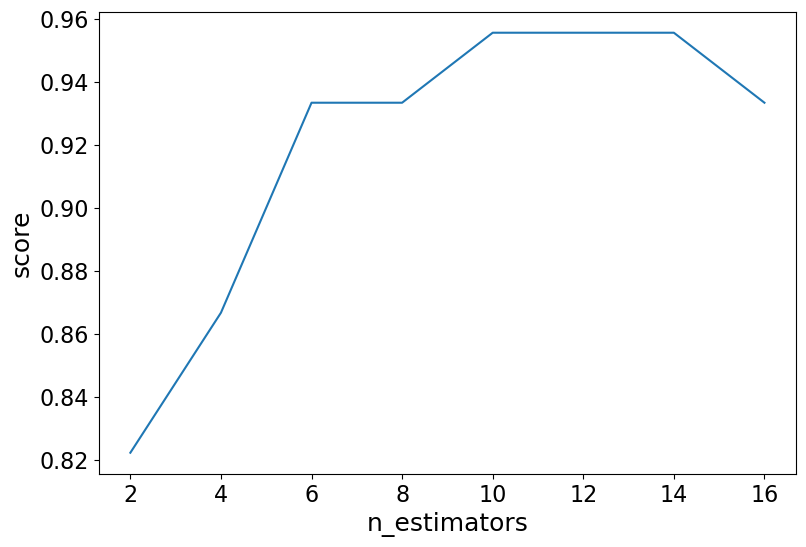

In [6]:
# Import the necessery data and evaluate the Baggingclassifier performance

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

x = data.data
y = data.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 22)

estimator_range = [2, 4, 6, 8, 10, 12, 14, 16]

models = []
scores = []

for n_estimator in estimator_range:
    clf = BaggingClassifier(n_estimators = n_estimator, random_state = 22)
    clf.fit(x_train, y_train)
    
    models.append(clf)
    scores.append(accuracy_score(y_true= y_test, y_pred = clf.predict(x_test)))


plt.figure(figsize = (9, 6))
plt.plot(estimator_range, scores)

plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)
plt.show()

In [30]:
# create a model with out_of_bag metric

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame=True)

x = data.data 
y = data.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators=12, oob_score = True, random_state=22)
oob_model.fit(x_train, y_train)

print(oob_model.oob_score_)

"""This is not wrong here need learn Cross-Validation , then can find the perfect value of random_state"""

0.9398496240601504


'Since the samples used in OOB and the test set are different, and the dataset is relatively small, there is a difference \n    in the accuracy. It is rare that they would be exactly the same, again OOB should be used quick means for estimating \n    error, but is not the only evaluation metric.'

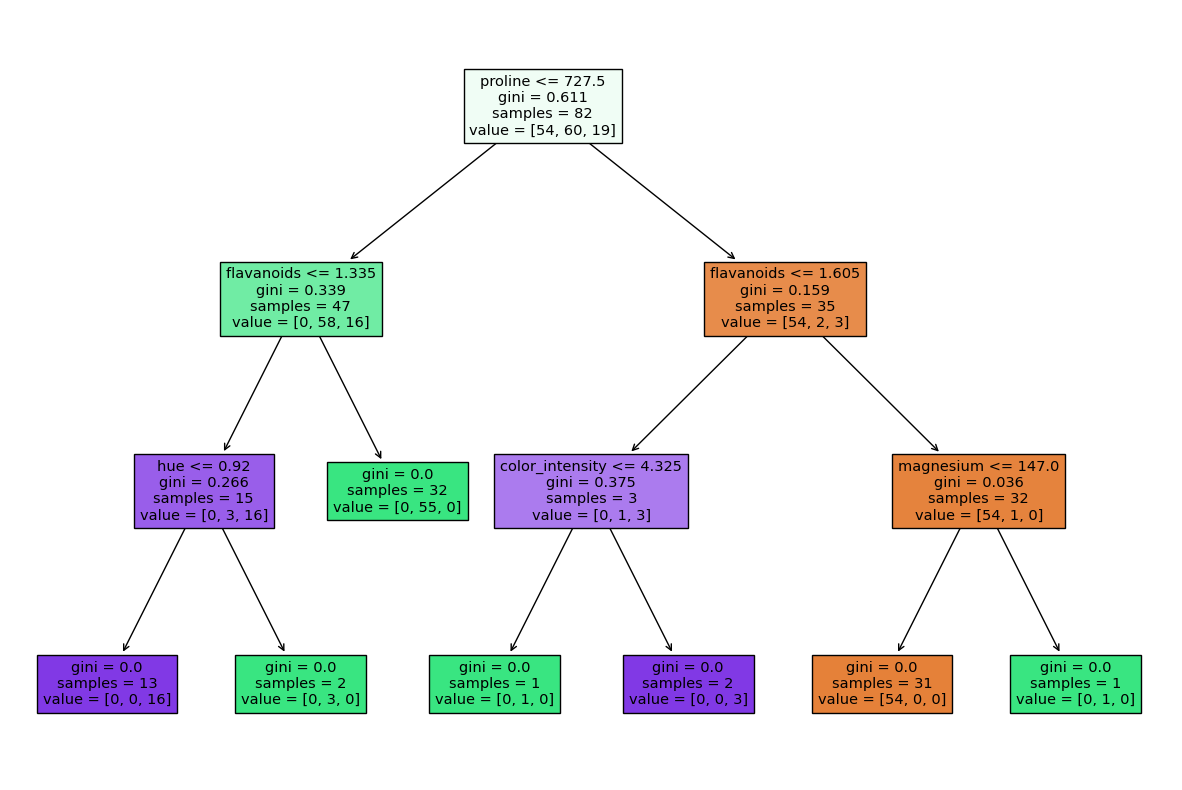

In [32]:
# Generate Decision Trees from Bagging Classifier

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame=True)

x = data.data 
y = data.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

clf = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)
clf.fit(x_train, y_train)


plt.figure(figsize=(15, 10))
plot_tree(clf.estimators_[0], feature_names=x.columns, filled=True)  

plt.show()

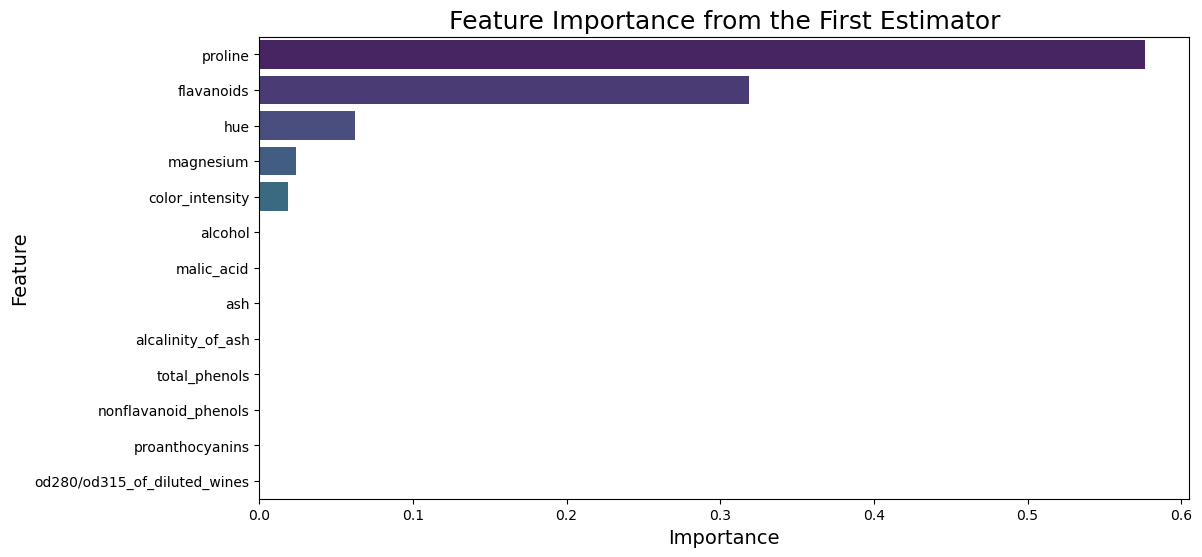

In [33]:
# Feature Importance Visualization

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame=True)

x = data.data 
y = data.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

clf = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)
clf.fit(x_train, y_train)

importances = clf.estimators_[0].feature_importances_
features = x.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from the First Estimator', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()


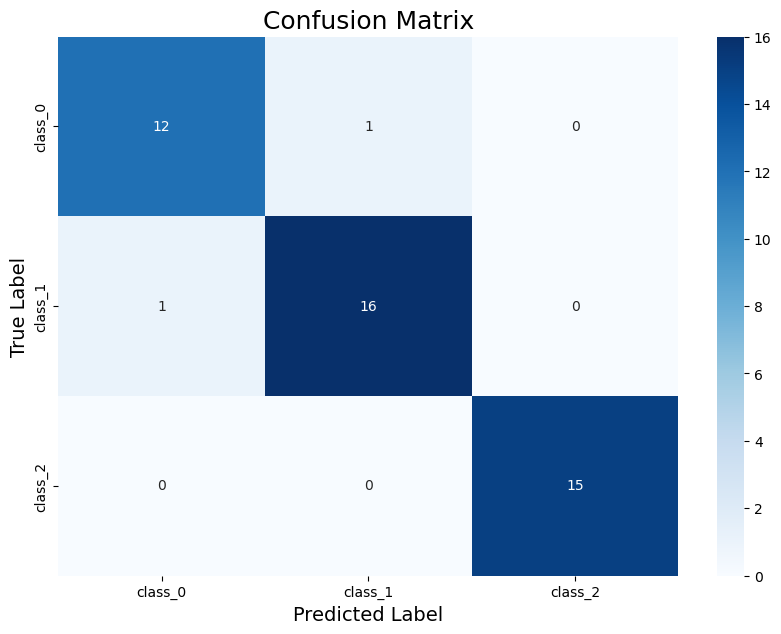

In [34]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame=True)

x = data.data 
y = data.target 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=22)

clf = BaggingClassifier(n_estimators=12, oob_score=True, random_state=22)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()